<a href="https://www.kaggle.com/code/taseermehboob9/90-accuracy-covid?scriptVersionId=211595667" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [9]:
import numpy as np 
import pandas as pd 
import os

import tensorflow as tf 
import matplotlib.pyplot as plt

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator

for dirname, dirnames, filenames in os.walk('/kaggle/input'):
    if dirnames:# Adjust based on your needs
        for subdirname in dirnames:
            print(os.path.join(dirname, subdirname))


/kaggle/input/covid19-image-dataset
/kaggle/input/covid19-image-dataset/Covid19-dataset
/kaggle/input/covid19-image-dataset/Covid19-dataset/test
/kaggle/input/covid19-image-dataset/Covid19-dataset/train
/kaggle/input/covid19-image-dataset/Covid19-dataset/test/Normal
/kaggle/input/covid19-image-dataset/Covid19-dataset/test/Viral Pneumonia
/kaggle/input/covid19-image-dataset/Covid19-dataset/test/Covid
/kaggle/input/covid19-image-dataset/Covid19-dataset/train/Normal
/kaggle/input/covid19-image-dataset/Covid19-dataset/train/Viral Pneumonia
/kaggle/input/covid19-image-dataset/Covid19-dataset/train/Covid


In [10]:
train_dir = '/kaggle/input/covid19-image-dataset/Covid19-dataset/train'
test_dir = '/kaggle/input/covid19-image-dataset/Covid19-dataset/test'

train_datagen = ImageDataGenerator(rescale=1.0/255.0)

test_datagen = ImageDataGenerator(rescale=1.0/255.0)

train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size=(224, 224),
                                                    batch_size=32,
                                                    class_mode='categorical')

test_generator = test_datagen.flow_from_directory(test_dir,
                                                  target_size=(224, 224),
                                                  batch_size=32,
                                                  class_mode='categorical')

Found 251 images belonging to 3 classes.
Found 66 images belonging to 3 classes.


In [11]:

model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)))
model.add(MaxPooling2D(padding='same'))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(padding='same'))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(padding='same'))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.6))

model.add(Dense(64, activation='relu'))  
model.add(Dropout(0.6))

model.add(Dense(3, activation='softmax'))

model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 55, 55, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 53, 53, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 27, 27, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 93312)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 128)            │    11,944,064 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 3)              │           195 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 12,045,763 (45.95 MB)

 Trainable params: 12,045,763 (45.95 MB)

 Non-trainable params: 0 (0.00 B)

In [12]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [13]:
history = model.fit(train_generator,
          epochs=15, 
          validation_data=test_generator)

Epoch 1/15
8/8 ━━━━━━━━━━━━━━━━━━━━ 20s 1s/step - accuracy: 0.3560 - loss: 1.7820 - val_accuracy: 0.6061 - val_loss: 1.0828
Epoch 2/15
8/8 ━━━━━━━━━━━━━━━━━━━━ 6s 131ms/step - accuracy: 0.3206 - loss: 1.0910 - val_accuracy: 0.5303 - val_loss: 1.0374
Epoch 3/15
8/8 ━━━━━━━━━━━━━━━━━━━━ 7s 152ms/step - accuracy: 0.4930 - loss: 1.0020 - val_accuracy: 0.8182 - val_loss: 0.8744
Epoch 4/15
8/8 ━━━━━━━━━━━━━━━━━━━━ 6s 135ms/step - accuracy: 0.6329 - loss: 0.8735 - val_accuracy: 0.6970 - val_loss: 0.7653
Epoch 5/15
8/8 ━━━━━━━━━━━━━━━━━━━━ 6s 148ms/step - accuracy: 0.7034 - loss: 0.6917 - val_accuracy: 0.7121 - val_loss: 0.5813
Epoch 6/15
8/8 ━━━━━━━━━━━━━━━━━━━━ 6s 126ms/step - accuracy: 0.7076 - loss: 0.7027 - val_accuracy: 0.7273 - val_loss: 0.5115
Epoch 7/15
8/8 ━━━━━━━━━━━━━━━━━━━━ 6s 134ms/step - accuracy: 0.7621 - loss: 0.6048 - val_accuracy: 0.8939 - val_loss: 0.3904
Epoch 8/15
8/8 ━━━━━━━━━━━━━━━━━━━━ 6s 129ms/step - accuracy: 0.8359 - loss: 0.4122 - val_accuracy: 0.8636 - val_loss: 0

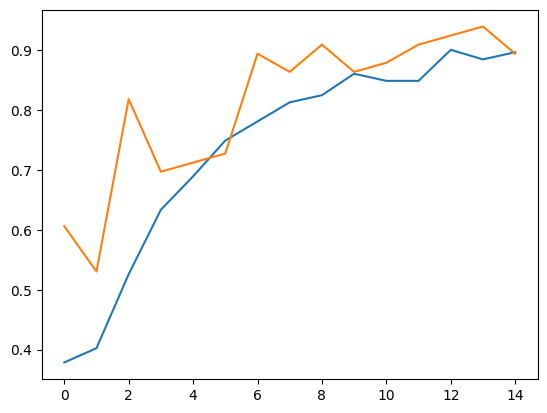

In [14]:
plt.plot(history.history['accuracy'], label = 'Training Accuracy')
plt.plot(history.history['val_accuracy'], label = 'Val Accuracy')

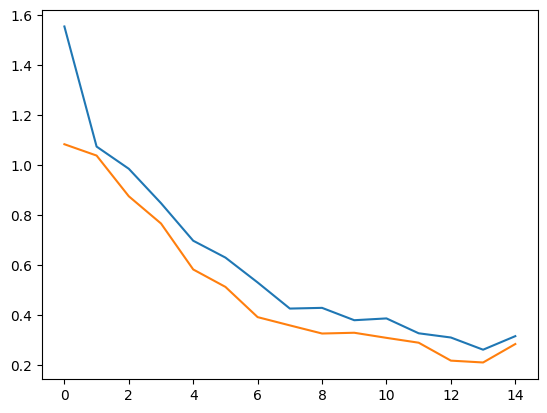

In [15]:
plt.plot(history.history['loss'], label = 'Training Loss')
plt.plot(history.history['val_loss'], label = 'Val Loss')